In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("D:\\Project\\HR analytics project\\train_LZdllcl.csv")

In [3]:
df.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

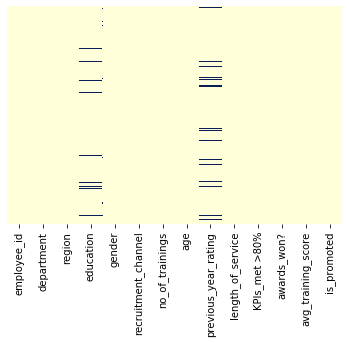

In [6]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap="YlGnBu")

In [7]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
df.drop(df.describe().columns,axis=1).describe()

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


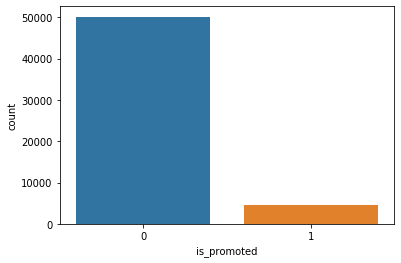

In [9]:
sns.countplot(df["is_promoted"])

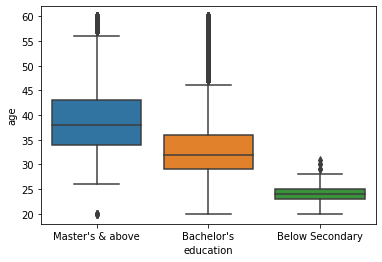

In [10]:
sns.boxplot(x="education",y="age",data=df)

In [11]:
def fil_edu(ed_age):
    if pd.isna(ed_age[0]):
        if ed_age[1] < 27 :
            return "Below Secondary"
        elif ed_age[1] < 35:
            return "Bachelor's"
        else:
            return "Master's & above"
    else:
        return ed_age[0]

In [12]:
df["education"]=df[["education","age"]].apply(fil_edu,axis=1)

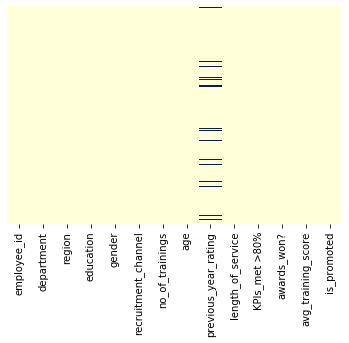

In [13]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap="YlGnBu")

In [ ]:
sns.pairplot(df)

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

### the correlation in age and length_of_service is very high. I will run a PCA and feature engineer it to a single feature.


In [14]:
df.drop("employee_id",axis=1,inplace=True)

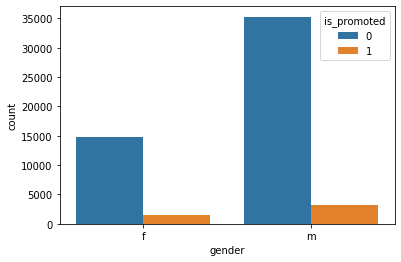

In [16]:
sns.countplot(df["gender"],hue=df["is_promoted"])

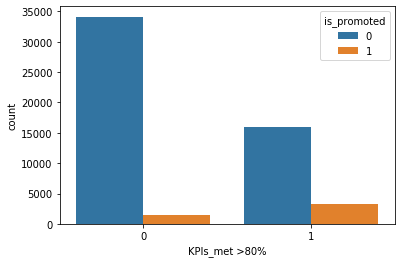

In [17]:
sns.countplot(df["KPIs_met >80%"],hue=df["is_promoted"])

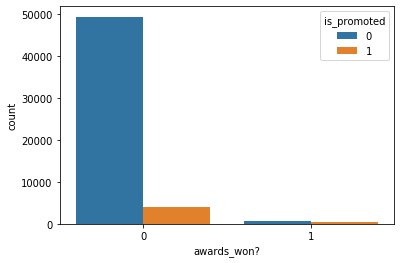

In [18]:
sns.countplot(df["awards_won?"],hue=df["is_promoted"])

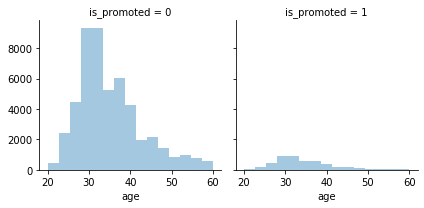

In [19]:
g = sns.FacetGrid(df, col = "is_promoted")
g.map(sns.distplot, "age",kde=False,bins=15)
plt.show()

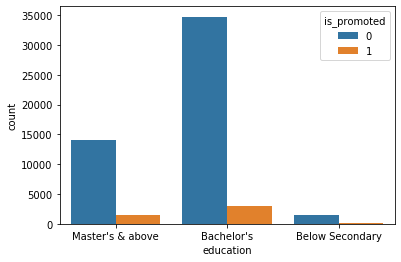

In [20]:
sns.countplot("education",data=df,hue="is_promoted")

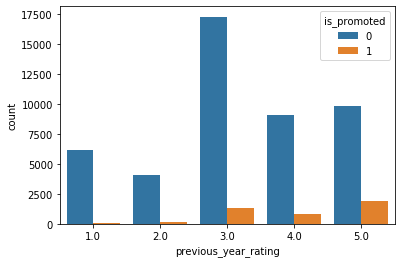

In [21]:
sns.countplot("previous_year_rating",data=df,hue="is_promoted")

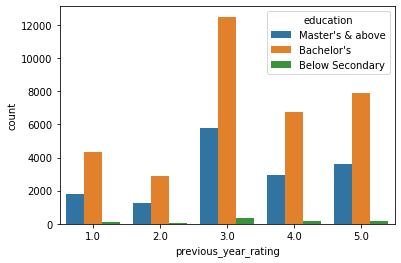

In [22]:
sns.countplot("previous_year_rating",data=df,hue="education")

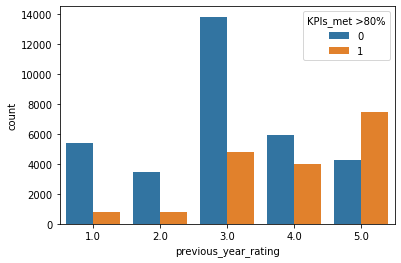

In [23]:
sns.countplot("previous_year_rating",data=df,hue='KPIs_met >80%')

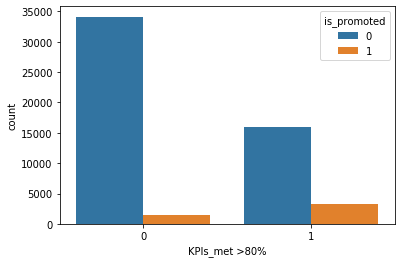

In [24]:
sns.countplot('KPIs_met >80%',data=df,hue="is_promoted")

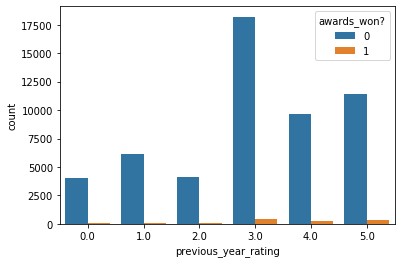

In [33]:
sns.countplot("previous_year_rating",data=df,hue='awards_won?')

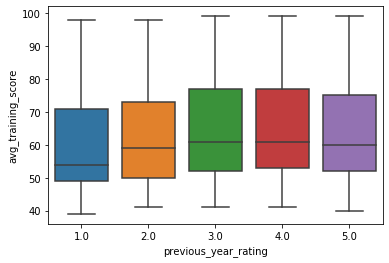

In [26]:
sns.boxplot(x='previous_year_rating',y='avg_training_score',data=df)

In [25]:
df[df["previous_year_rating"].isna()].describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,4124.000000,4124.000000,0.0,4124.0,4124.000000,4124.000000,4124.000000,4124.000000
mean,1.310136,26.873424,NaN,1.0,0.349661,0.023278,63.357420,0.082202
std,0.708621,2.718587,NaN,0.0,0.476921,0.150805,13.801152,0.274705
min,1.000000,20.000000,NaN,1.0,0.000000,0.000000,40.000000,0.000000
25%,1.000000,25.000000,NaN,1.0,0.000000,0.000000,51.000000,0.000000
50%,1.000000,27.000000,NaN,1.0,0.000000,0.000000,60.000000,0.000000
75%,1.000000,29.000000,NaN,1.0,1.000000,0.000000,77.000000,0.000000
max,9.000000,43.000000,NaN,1.0,1.000000,1.000000,99.000000,1.000000


### for all the previous_year_rating "na", the length of service is less than 1. It makes sense, therefore, i am incorporating prevoius year rating as 0.

In [28]:
def pr_rating(rating):
    if pd.isna(rating):
            return 0
    else:
        return rating

In [31]:
df["previous_year_rating"]=df["previous_year_rating"].apply(pr_rating)

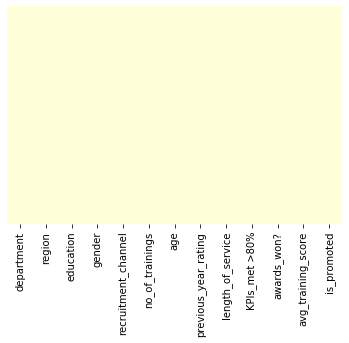

In [34]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap="YlGnBu")

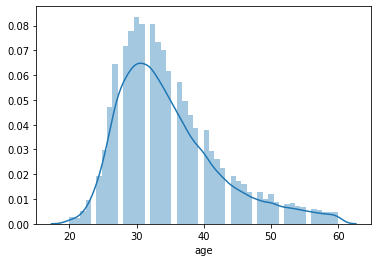

In [35]:
sns.distplot(df["age"])

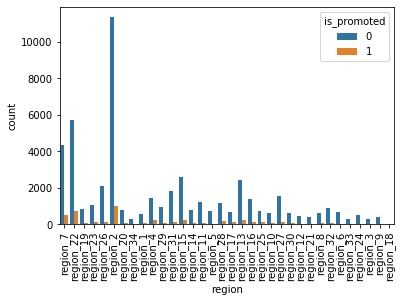

In [37]:
sns.countplot("region",data=df,hue="is_promoted")
plt.xticks(rotation=90)
plt.show()

In [38]:
department_dummies=pd.get_dummies(df["department"],drop_first=True)
education_dummies=pd.get_dummies(df["education"],drop_first=True)
gender_dummies=pd.get_dummies(df["gender"],drop_first=True)
recruitment_channel_dummies=pd.get_dummies(df["recruitment_channel"],drop_first=True)
region_dummies=pd.get_dummies(df["region"],drop_first=True)

In [39]:
main_train=pd.concat([df,department_dummies,education_dummies,gender_dummies,recruitment_channel_dummies,region_dummies],axis=1).drop(["department","education","gender","recruitment_channel","region"],axis=1)

### balancing the data set

In [40]:
from imblearn.combine import SMOTETomek

In [41]:
smk=SMOTETomek()

In [42]:
X,y=smk.fit_sample(main_train.drop("is_promoted",axis=1),main_train["is_promoted"])

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc=RandomForestClassifier(n_estimators=200)

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [51]:
prediction=rfc.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     15102
           1       0.96      0.95      0.95     14970

    accuracy                           0.95     30072
   macro avg       0.95      0.95      0.95     30072
weighted avg       0.95      0.95      0.95     30072



### training on the full set

In [54]:
X_train,y_train=main_train.drop("is_promoted",axis=1),main_train["is_promoted"]

### building the model

In [55]:
rfc=RandomForestClassifier(n_estimators=200)

In [56]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

### predicting from the main test file

In [74]:
test_main=pd.read_csv("D:\\Project\\HR analytics project\\test_2umaH9m.csv")

In [75]:
test_emp_id=test_main["employee_id"]

In [60]:
test_main["education"]=test_main[["education","age"]].apply(fil_edu,axis=1)

In [62]:
test_main.drop("employee_id",axis=1,inplace=True)

In [63]:
test_main[test_main["previous_year_rating"].isna()].describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,1812.000000,1812.000000,0.0,1812.0,1812.000000,1812.000000,1812.000000
mean,1.328366,26.852097,NaN,1.0,0.356512,0.022075,63.486203
std,0.702454,2.743434,NaN,0.0,0.479101,0.146968,14.224217
min,1.000000,20.000000,NaN,1.0,0.000000,0.000000,40.000000
25%,1.000000,25.000000,NaN,1.0,0.000000,0.000000,50.000000
50%,1.000000,27.000000,NaN,1.0,0.000000,0.000000,60.000000
75%,1.000000,29.000000,NaN,1.0,1.000000,0.000000,78.000000
max,7.000000,42.000000,NaN,1.0,1.000000,1.000000,99.000000


In [64]:
test_main["previous_year_rating"]=test_main["previous_year_rating"].apply(pr_rating)

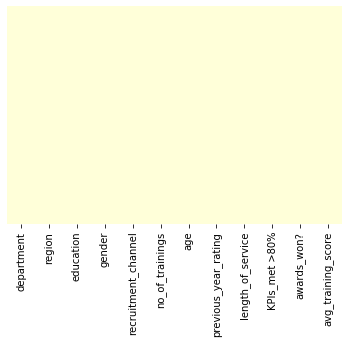

In [65]:
sns.heatmap(test_main.isnull(),cbar=False,yticklabels=False,cmap="YlGnBu")

In [67]:
department_dummies=pd.get_dummies(test_main["department"],drop_first=True)
education_dummies=pd.get_dummies(test_main["education"],drop_first=True)
gender_dummies=pd.get_dummies(test_main["gender"],drop_first=True)
recruitment_channel_dummies=pd.get_dummies(test_main["recruitment_channel"],drop_first=True)
region_dummies=pd.get_dummies(test_main["region"],drop_first=True)

In [70]:
X_test=pd.concat([test_main,department_dummies,education_dummies,gender_dummies,recruitment_channel_dummies,region_dummies],axis=1).drop(["department","education","gender","recruitment_channel","region"],axis=1)

In [71]:
prediction=rfc.predict(X_test)

In [82]:
final_submission=pd.concat([test_emp_id,pd.DataFrame(prediction,columns=["is_promoted"])],axis=1)

In [85]:
final_submission

,employee_id,is_promoted
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0
...,...,...
23485,53478,0
23486,25600,0
23487,45409,0
23488,1186,0


In [86]:
final_submission.set_index("employee_id",inplace=True)

In [87]:
final_submission.to_csv("D:\\Project\\HR analytics project\\final_submission_upload.csv")